## 机器学习作业 6 - 支持向量机的应用

### 在本作业练习中，我们将使用支持向量机（SVM）来构建垃圾邮件分类器。本次作业内容包括：

（1）从一些简单的2D数据集开始使用SVM来查看它们的工作原理。 观察不同的C值对分类结果的影响，了解高斯核函数用于非线性分类的用法。

（2）对一组原始电子邮件进行一些预处理工作，并使用SVM在处理的电子邮件上构建分类器，以确定它们是否为垃圾邮件。

### 1. 观察不同的C值对分类效果的影响。

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

（1）将数据用散点图表示，其中类标签由符号表示（+表示正类，o表示负类）

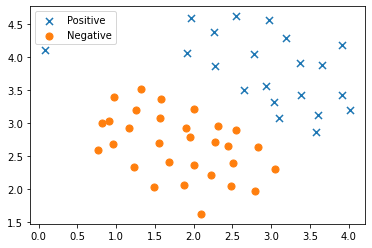

In [110]:
raw_data = loadmat('data/hw6data1.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

In [111]:
def plotDecisionBoundary(clf,data):  # 绘制超平面函数
    x_min, x_max=np.array(data['X1']).min(), np.array(data['X1']).max()
    y_min, y_max=np.array(data['X2']).min(), np.array(data['X2']).max()
    xx, yy=np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,colors = 'red') 

（2）调用scikit-learn中的svm.LinearSVC库来执行SVM。初始的C值为1。关于scikit-learn的帮助，请自行查阅资料学习（http://sklearn.apachecn.org/#/docs/68）

In [118]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=10000) # 初始化一个分类器

（3）尝试不同的C值，观察对结果的影响。先看一下C=1的结果。

In [119]:
clfs1=svc.fit(data[['X1', 'X2']], data['y']) # 训练分类器
svc.score(data[['X1', 'X2']], data['y']) # 计算准确率

0.9803921568627451

其次，让我们看看如果C的值越大，会发生什么，例如C=100。

In [128]:
svc2 = svm.LinearSVC(C=1000, loss='hinge', max_iter=10000)
clfs2=svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])
# 每次运行好像可能会不一样

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


1.0

<font color=red>请尝试增大C的值</font>，使得准确率接近1的完美分类结果。接下来的代码将：

a. 查看每个类别预测的<font color=red>置信水平</font>，即样本点与超平面距离的函数。

b. 绘制决策边界（超平面）

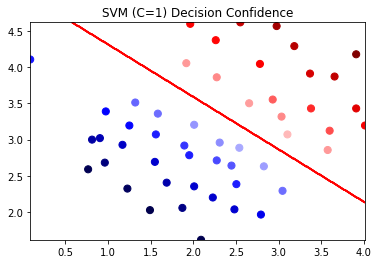

In [129]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
plotDecisionBoundary(clfs1,data) 
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

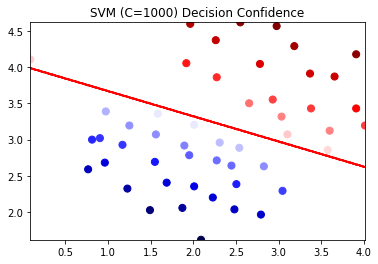

In [130]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
plotDecisionBoundary(clfs2,data) 
ax.set_title('SVM (C=1000) Decision Confidence')
plt.show()

# 请回答生成的散点图，颜色深浅的含义
# 红色和蓝色的深浅分辨代表的含义是：
# 颜色越深距离分类超平面越远

## 2. 高斯核函数

（1）现在我们将从线性SVM转移到能够使用核函数进行非线性分类的SVM。 
我们不使用scikit-learn中内置的高斯核函数，请自行实现。

In [131]:
# 实现高斯核函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1 - x2, 2).sum() / (2 *(sigma ** 2)))#请在这里补充一行代码来完成高斯核函数的实现


In [132]:
x1 = np.array([1.0, 1.0, 2.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

#此处的结果将在作业的客观题中作答


0.09301448921066349

（2）接下来，我们换另一个数据集，这次用非线性决策边界。

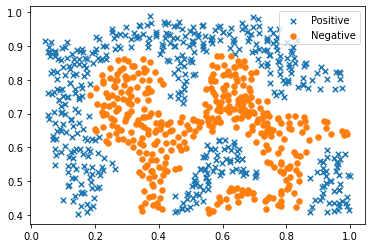

In [133]:
raw_data = loadmat('data/hw6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

（3）对于该数据集，我们将使用内置的高斯核函数RBF构建支持向量机分类器，并检查其对训练数据的准确性。 

为了可视化决策边界，这一次我们将根据负样本的预测概率来对点做红色阴影。

同时，我们还可以绘制决策边界来进行观察，请自行添加代码。

In [134]:
svc3 = svm.SVC(C=100, gamma=10, kernel='rbf', probability=True)
# 查阅svm.SVC相关资料，回答此处的gamma参数和rbf核函数的关系
# gamma代表：γ = 1 / (2σ2)：γ 越大高斯分布越窄，样本分布越集中；γ 越小高斯分布越宽，样本分布越密集；
clfs3=svc3.fit(data[['X1', 'X2']], data['y'])
svc3.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

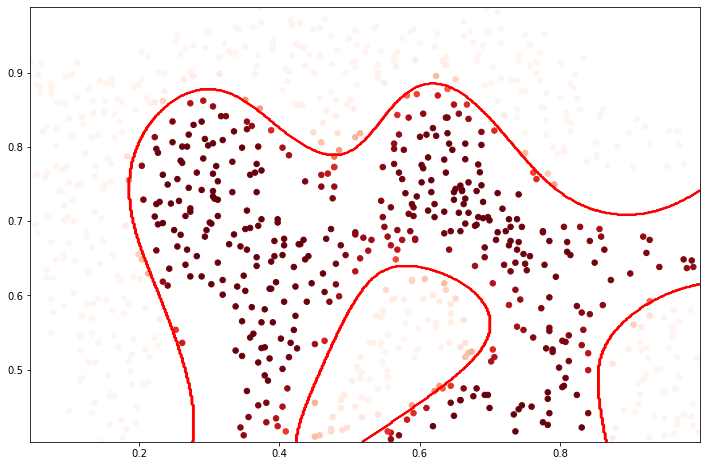

In [135]:
data['Probability'] = svc3.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12, 8))
# 此处补充一行代码绘制决策边界
plotDecisionBoundary(clfs3, data)
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

## 3. 寻找最优参数
接下来，我们使用第三个数据集，该数据集包括训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。
尽管我们可以使用scikit-learn的内置网格搜索来做到这一点，但是为了帮助大家更好的理解网格搜索原理，我们将从头开始实现一个简单的网格搜索。

In [136]:
raw_data = loadmat('data/hw6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C_val in C_values:
    for gamma_val in gamma_values:
        #此处补充完善3行代码，完成网格搜索
        svc = svm.SVC(C=C_val, gamma=gamma_val, max_iter=1000)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        #补充结束
        
        if score > best_score:
            best_score = score
            best_params['C'] = C_val
            best_params['gamma'] = gamma_val

best_score, best_params

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

(0.965, {'C': 0.3, 'gamma': 100})

## 构建垃圾邮件过滤器
现在，我们开始使用SVM来构建垃圾邮件过滤器。 
在本部分的样本数据中，包括spamTrina.mat和spamTest.mat，分别对应的是训练集和测试集。
我们已经对垃圾邮件数据进行了预处理：例如，去除邮件中的HTML标记，只保留纯文本信息，将邮件中的字词映射到字典中。

In [142]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

# 观察 spam_train 训练集中的数据
spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [143]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

# 观察X, y, Xtest, ytest 形状
X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

我们能看到每个邮件已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示邮件中是否存在单词。 我们用测试集数据来评估一下训练的效果。

In [144]:
#这里使用svm.SVC的默认参数来进行训练，请回答C和gamma的默认值是多少
svc = svm.SVC(C=2, gamma='scale')
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
# C = 1， auto= 1 / n_features = 1 / 1899

Training accuracy = 99.68%


In [145]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy = 99.1%


上面的结果是使用默认参数的，测试集精度已经达到了95.3%，<font color=red>请尝试参数调整来获得更高的精度（如96%以上）</font>。

本次作业到这里就结束了。